In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='N48Tu6GRCG2m9RDTBw_EZoxrPGQJzNkQGz-FIUWJljsi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'nsapeligibilitymlproject-donotdelete-pr-aik97on8tnwmj6'
object_key = 'nsapallschemes.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)


,finyear,lgdstatecode,statename,lgddistrictcode,districtname,schemecode,totalbeneficiaries,totalmale,totalfemale,totaltransgender,totalsc,totalst,totalgen,totalobc,totalaadhaar,totalmobilenumber
0,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNDPS,108,72,36,0,0,3,104,1,108,69
1,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNOAPS,8438,5059,3379,0,37,235,8083,83,8371,7190
2,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNWPS,202,0,202,0,1,15,180,6,200,159
3,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNDPS,310,211,99,0,0,77,200,33,234,110
4,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNOAPS,5958,3958,2000,0,2,1347,4367,242,3875,2287
5,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNWPS,382,0,382,0,0,65,298,19,260,90
6,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNDPS,95,63,32,0,0,6,81,8,94,93
7,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNOAPS,5021,2911,2110,0,1,197,4443,380,5021,4935
8,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNWPS,304,0,304,0,0,20,260,24,304,258
9,2025-2026,1,JAMMU AND KASHMIR,12,RAJAURI,IGNDPS,78,52,26,0,5,5,68,0,72,3


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   finyear             2156 non-null   object
 1   lgdstatecode        2156 non-null   int64 
 2   statename           2156 non-null   object
 3   lgddistrictcode     2156 non-null   int64 
 4   districtname        2156 non-null   object
 5   schemecode          2156 non-null   object
 6   totalbeneficiaries  2156 non-null   int64 
 7   totalmale           2156 non-null   int64 
 8   totalfemale         2156 non-null   int64 
 9   totaltransgender    2156 non-null   int64 
 10  totalsc             2156 non-null   int64 
 11  totalst             2156 non-null   int64 
 12  totalgen            2156 non-null   int64 
 13  totalobc            2156 non-null   int64 
 14  totalaadhaar        2156 non-null   int64 
 15  totalmobilenumber   2156 non-null   int64 
dtypes: int64(12), object(4)


In [4]:
df_1.isnull().sum()

finyear               0
lgdstatecode          0
statename             0
lgddistrictcode       0
districtname          0
schemecode            0
totalbeneficiaries    0
totalmale             0
totalfemale           0
totaltransgender      0
totalsc               0
totalst               0
totalgen              0
totalobc              0
totalaadhaar          0
totalmobilenumber     0
dtype: int64

In [5]:
df_1["schemecode"].value_counts()

schemecode
IGNOAPS    731
IGNWPS     723
IGNDPS     702
Name: count, dtype: int64

In [6]:
df_1.describe()

,lgdstatecode,lgddistrictcode,totalbeneficiaries,totalmale,totalfemale,totaltransgender,totalsc,totalst,totalgen,totalobc,totalaadhaar,totalmobilenumber
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,18.085807,366.853432,13864.290353,5518.308442,8344.925325,0.926716,2370.432282,1387.965213,5766.059369,4334.096011,12084.051948,9853.239332
std,9.770668,211.760095,22855.917172,11926.748715,12518.941254,6.692879,4760.239674,3850.474062,13814.145206,8513.111659,20514.175808,18277.289930
min,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,185.000000,961.750000,0.000000,418.750000,0.000000,55.000000,12.000000,223.000000,54.000000,689.500000,466.750000
50%,19.000000,365.000000,4702.500000,503.000000,3415.000000,0.000000,481.000000,139.000000,1221.000000,692.500000,3199.500000,2419.500000
75%,24.000000,546.250000,17377.000000,4819.500000,11514.750000,0.000000,2432.750000,992.250000,5186.000000,4379.500000,14402.000000,10800.250000
max,38.000000,763.000000,278410.000000,130524.000000,147780.000000,165.000000,61247.000000,56759.000000,210999.000000,94046.000000,193015.000000,193091.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df_ml = df_1.copy()

In [9]:
le_state = LabelEncoder()
df_ml['statename'] = le_state.fit_transform(df_ml['statename'])

le_district = LabelEncoder()
df_ml['districtname'] = le_district.fit_transform(df_ml['districtname'])

le_scheme = LabelEncoder()
df_ml['schemecode'] = le_scheme.fit_transform(df_ml['schemecode'])

In [10]:
df_ml['finyear'] = df_ml['finyear'].astype('category').cat.codes

In [11]:
X = df_ml.drop('schemecode', axis=1)
y = df_ml['schemecode']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = rf.predict(X_test)

In [18]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9722222222222222


In [19]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_scheme.classes_))


Classification Report:
               precision    recall  f1-score   support

      IGNDPS       0.96      0.96      0.96       139
     IGNOAPS       0.97      0.96      0.97       151
      IGNWPS       0.99      1.00      0.99       142

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



In [20]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[133   4   2]
 [  6 145   0]
 [  0   0 142]]


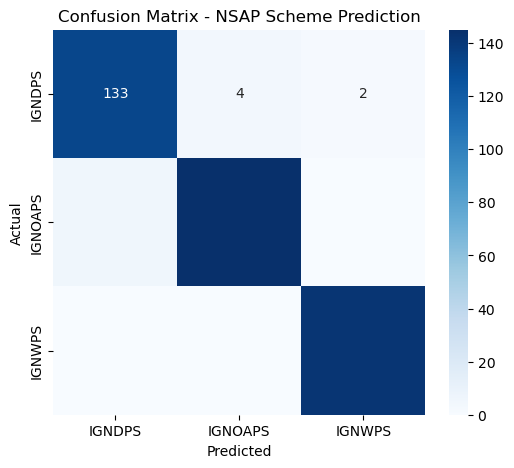

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_scheme.classes_, yticklabels=le_scheme.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - NSAP Scheme Prediction")
plt.show()

In [22]:
import joblib

# Save the model
joblib.dump(rf, 'nsap_scheme_classifier.pkl')

['nsap_scheme_classifier.pkl']